In [19]:
if 'libraries_imported' not in globals():
    libraries_imported = False

if libraries_imported == False:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os
    from datetime import datetime, timedelta
    from datetime import datetime
    from scipy.interpolate import make_interp_spline
    import plotly.graph_objects as go
    from scipy.signal import butter, filtfilt
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from keras_tuner import RandomSearch, HyperModel
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense
    from tensorflow.keras.callbacks import EarlyStopping
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from keras_tuner import RandomSearch, HyperModel
    from tensorflow.keras.layers import Input
    import sys
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    import numpy as np
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import RobustScaler
    import tensorflow as tf
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    from sklearn.preprocessing import RobustScaler
    import joblib
    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
    from sklearn.utils.class_weight import compute_class_weight
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import joblib
    import tensorflow as tf
    from sklearn.preprocessing import RobustScaler
    from sklearn.model_selection import train_test_split
    from sklearn.utils.class_weight import compute_class_weight
    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
    import numpy as np
    import pandas as pd
    import joblib
    import tensorflow as tf
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE




    # # Display the first few rows
    # import ace_tools as tools  # Importing display tool

In [20]:

# Load and clean SaniWASE dataset
saniWASE_df = pd.read_csv("datasets/SaniWASE_Data_Cleaned_t1.csv")
saniWASE_df["date"] = pd.to_datetime(saniWASE_df["datetime"])
saniWASE_df.drop(columns=["index", "datetime", "f/m_ratio", "fos", "tac"], inplace=True)
saniWASE_df = saniWASE_df.drop_duplicates()
# Load and clean Cook dataset
cook_df = pd.read_csv("datasets/Cook_Data_Cleaned_t1.csv")
cook_df['date'] = pd.to_datetime(cook_df['date'])
cook_df = cook_df.groupby('date').mean()
cook_df = cook_df.drop_duplicates()
cook_df.reset_index(inplace=True)





cook_df.drop(columns=["Unnamed: 0"], inplace=True)
cook_df["methane_percentage"] *= 100

# Ensure consistent column order, keeping "date" first
column_order = ["date"] + [col for col in saniWASE_df.columns if col != "date"]
saniWASE_df = saniWASE_df[column_order]
cook_df = cook_df[column_order]




#Only keep live data inputs 

saniWASE_df.drop(columns=["h2s_ppm", "t1_cod", "t1_olr", "eq_cod"], inplace=True)
cook_df.drop(columns=["h2s_ppm", "t1_cod", "t1_olr", "eq_cod"], inplace=True)


display(saniWASE_df.head())
display(cook_df.head())


saniWASE_df_interpolated = saniWASE_df.interpolate(method = 'ffill')
cook_df_interpolated = cook_df.interpolate(method = 'ffill')
# cook_df_interpolated = cook_df.dropna()


/tmp/ipykernel_25840/1451004262.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  saniWASE_df["date"] = pd.to_datetime(saniWASE_df["datetime"])


,date,eq_ph,feed_vol,t1_ph,current,temp,methane_percentage,hrt,biogas_vol,fostac
0,2022-07-06,5.5,144,7.1,1652,36.8,65.1,25.0,1232.0,0.53
1,2022-08-06,5.3,144,7.2,1652,36.8,68.0,25.0,1019.0,0.34
2,2022-09-06,5.2,144,7.3,1652,36.8,70.9,25.0,1005.0,0.15
3,2022-10-06,5.2,192,7.3,1652,34.8,65.7,19.0,892.0,0.19
4,2022-11-06,NaN,192,NaN,1652,NaN,65.7,19.0,1100.0,NaN


,date,eq_ph,feed_vol,t1_ph,current,temp,methane_percentage,hrt,biogas_vol,fostac
0,2024-11-04,3.7,60.0,7.0,497.422,35.770769,66.66,15.0,300.0,0.14
1,2024-11-05,3.7,60.0,7.0,545.210,36.464368,62.71,15.0,690.0,0.16
2,2024-11-06,3.7,60.0,7.0,519.733,36.996667,64.16,15.0,660.0,0.15
3,2024-11-07,3.6,60.0,7.0,506.521,35.317529,61.32,15.0,770.0,0.16
4,2024-11-08,3.7,60.0,7.0,484.783,35.906047,60.61,15.0,740.0,0.16


/tmp/ipykernel_25840/1451004262.py:38: FutureWarning: DataFrame.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  saniWASE_df_interpolated = saniWASE_df.interpolate(method = 'ffill')
/tmp/ipykernel_25840/1451004262.py:39: FutureWarning: DataFrame.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cook_df_interpolated = cook_df.interpolate(method = 'ffill')


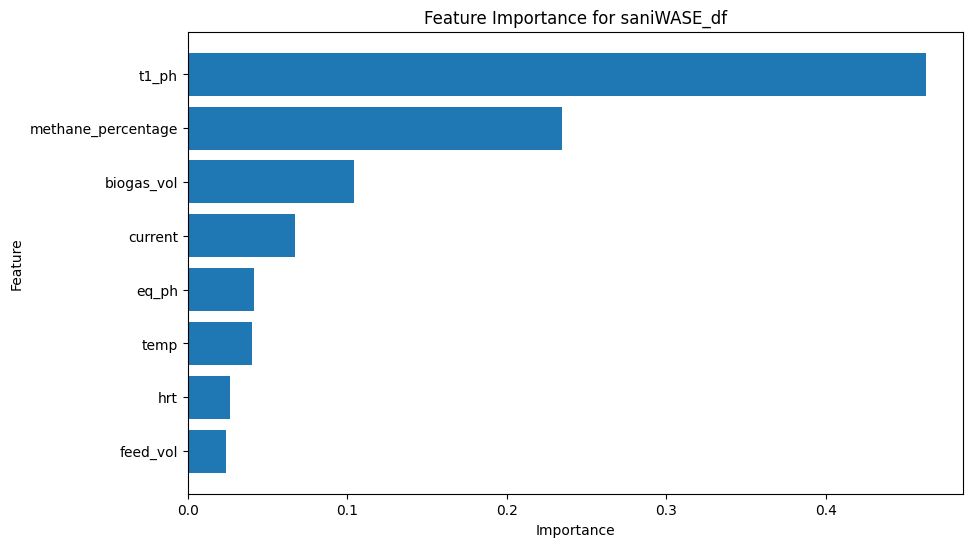

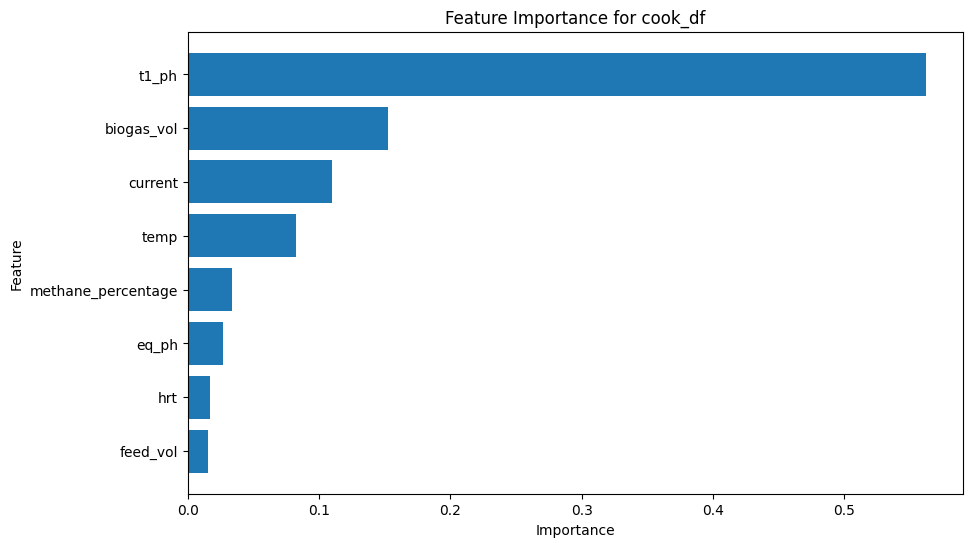

In [21]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Function to perform feature importance analysis
def feature_importance_analysis(df, target_column, drop_columns, title):
    # Prepare the data
    X = df.drop(drop_columns, axis=1)
    y = df[target_column]

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modeling
    model = RandomForestRegressor(n_estimators=300, random_state=42)
    model.fit(X_train, y_train)

    # Feature importance extraction
    importances = model.feature_importances_
    features = X_train.columns

    # Sorting the features by importance
    indices = np.argsort(importances)
    sorted_features = [features[i] for i in indices]
    sorted_importances = importances[indices]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_importances)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(title)
    plt.show()

# Feature importance for saniWASE_df
feature_importance_analysis(
    df= saniWASE_df_interpolated,
    target_column='fostac',
    drop_columns=['fostac', 'date'],
    title='Feature Importance for saniWASE_df'
)

# Feature importance for cook_df
feature_importance_analysis(
    df= cook_df_interpolated,
    target_column='fostac',
    drop_columns=['fostac', 'date'],
    title='Feature Importance for cook_df'
)



# Feature Importance Comparison

## Common Observations
- **`t1_ph`** is the most significant feature in both datasets (importance > 0.4).
- **`biogas_vol`** consistently ranks among the top three features.

## Notable Differences

| Feature               | saniWASE_df Importance | cook_df Importance |
|-----------------------|------------------------|--------------------|
| **`methane_percentage`** | High (2nd)             | Low (6th)          |
| **`eq_ph`**              | Moderate (5th)         | High (2nd)         |
| **`feed_vol`**           | Low (8th)              | Moderate (4th)     |
| **`current`**            | Moderate (4th)         | Low (5th)          |
| **`temp`**               | Low (slightly higher)  | Very Low           |
| **`hrt`**                | Consistently low       | Lowest             |

## Overall Insights
- **`t1_ph`** consistently emerges as the most influential predictor, indicating pH's critical role across both scenarios.
- Secondary feature importance highlights dataset-specific dynamics:
  - **saniWASE_df** outcomes depend significantly on methane percentage and biogas volume.
  - **cook_df** outcomes rely heavily on equilibrium pH (`eq_ph`) and biogas volume.


In [22]:
scaler = joblib.load('ANN_hyperparams/robust_scaler.pkl')
df_interpolated  = cook_df_interpolated[['fostac', 'date', 't1_ph', 'biogas_vol', 'methane_percentage', 'current', 'temp']]


window_size = 3
df_interpolated['t1_ph_ma'] = df_interpolated['t1_ph'].rolling(window=window_size, min_periods=1).mean()
df_interpolated['biogas_vol_ma'] = df_interpolated['biogas_vol'].rolling(window=window_size, min_periods=1).mean()
df_interpolated['methane_percentage_ma'] = df_interpolated['methane_percentage'].rolling(window=window_size, min_periods=1).mean()
df_interpolated['current_ma'] = df_interpolated['current'].rolling(window=window_size, min_periods=1).mean()
df_interpolated['temp_ma'] = df_interpolated['temp'].rolling(window=window_size, min_periods=1).mean()

# Display the DataFrame to verify the moving averages
print(df_interpolated.head())

   fostac       date  t1_ph  biogas_vol  methane_percentage  current  \
0    0.14 2024-11-04    7.0       300.0               66.66  497.422   
1    0.16 2024-11-05    7.0       690.0               62.71  545.210   
2    0.15 2024-11-06    7.0       660.0               64.16  519.733   
3    0.16 2024-11-07    7.0       770.0               61.32  506.521   
4    0.16 2024-11-08    7.0       740.0               60.61  484.783   

        temp  t1_ph_ma  biogas_vol_ma  methane_percentage_ma  current_ma  \
0  35.770769       7.0     300.000000                 66.660  497.422000   
1  36.464368       7.0     495.000000                 64.685  521.316000   
2  36.996667       7.0     550.000000                 64.510  520.788333   
3  35.317529       7.0     706.666667                 62.730  523.821333   
4  35.906047       7.0     723.333333                 62.030  503.679000   

     temp_ma  
0  35.770769  
1  36.117569  
2  36.410601  
3  36.259521  
4  36.073414  


/tmp/ipykernel_25840/2017357033.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interpolated['t1_ph_ma'] = df_interpolated['t1_ph'].rolling(window=window_size, min_periods=1).mean()
/tmp/ipykernel_25840/2017357033.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interpolated['biogas_vol_ma'] = df_interpolated['biogas_vol'].rolling(window=window_size, min_periods=1).mean()


In [23]:
print(df_interpolated.info)

<bound method DataFrame.info of     fostac       date  t1_ph  biogas_vol  methane_percentage  current  \
0     0.14 2024-11-04    7.0       300.0              66.660  497.422   
1     0.16 2024-11-05    7.0       690.0              62.710  545.210   
2     0.15 2024-11-06    7.0       660.0              64.160  519.733   
3     0.16 2024-11-07    7.0       770.0              61.320  506.521   
4     0.16 2024-11-08    7.0       740.0              60.610  484.783   
5     0.16 2024-11-11    6.9       760.0              59.100  440.825   
6     0.18 2024-11-12    6.9      1130.0              57.760  469.710   
7     0.17 2024-11-14    6.9      1130.0              58.300  442.490   
8     0.16 2024-11-15    6.9      1060.0              60.351  439.181   
9     0.13 2024-11-16    7.0      1070.0              60.640  437.033   
10    0.12 2024-11-19    6.9      1000.0              62.020  430.155   
11    0.16 2024-11-21    6.9      1160.0              61.070  365.637   
12    0.15 2024-11-

In [24]:
import numpy as np
import pandas as pd
import joblib
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# Number of attempts
n_attempts = 1
initial_seed = 44

# Containers to store results across attempts
results_summary = []

# Load scaler and model template only once
scaler = joblib.load('ANN_hyperparams/robust_scaler.pkl')
model_template = tf.keras.models.load_model('ANN_hyperparams/best_deeper_classification_model.keras')

# Assume df_interpolated is defined
df = df_interpolated.copy()
target = 'fostac'
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.dropna(subset=[target], inplace=True)

bins = [0, 0.2, 0.4, 2.0]
labels = [0, 1, 2]
df['fostac_category'] = pd.cut(df[target], bins=bins, labels=labels, include_lowest=True)
df['fostac_category'] = df['fostac_category'].astype(int)
df.dropna(subset=['fostac_category'], inplace=True)

X = df.drop(columns=[target, 'fostac_category'])
y = df['fostac_category']

for attempt in range(n_attempts):
    print(f'\n🔄 Attempt {attempt + 1}/{n_attempts}')
    seed = initial_seed + attempt
    np.random.seed(seed)
    tf.random.set_seed(seed)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)
    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    smote = SMOTE(random_state=seed, k_neighbors=1)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

    model = tf.keras.models.clone_model(model_template)
    model.set_weights(model_template.get_weights())
    for layer in model.layers[:-2]:
        layer.trainable = False
    for layer in model.layers[-2:]:
        layer.trainable = True

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10, min_delta=1e-4, restore_best_weights=True, verbose=1)
    history = model.fit(X_train_smote, y_train_smote, epochs=200, validation_data=(X_val_scaled, y_val), batch_size=16, callbacks=[early_stopping], verbose=0)

    y_pred = np.argmax(model.predict(X_val_scaled), axis=1)
    report = classification_report(y_val, y_pred, output_dict=True, zero_division=0)

    accuracy = report['accuracy']
    precision_macro = report['macro avg']['precision']
    recall_macro = report['macro avg']['recall']
    f1_macro = report['macro avg']['f1-score']

    results_summary.append({
        'Attempt': attempt + 1,
        'Seed': seed,
        'Accuracy': accuracy,
        'Precision (Macro)': precision_macro,
        'Recall (Macro)': recall_macro,
        'F1-score (Macro)': f1_macro,
        'Class distribution': Counter(y_val),
    })

results_df = pd.DataFrame(results_summary)
print("\n📊 Performance Summary Across Attempts:\n")
print(results_df[['Attempt', 'Seed', 'Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-score (Macro)']])
results_df.to_csv('ANN_hyperparams/multiple_attempts_summary.csv', index=False)



🔄 Attempt 1/1
Restoring model weights from the end of the best epoch: 200.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

📊 Performance Summary Across Attempts:

   Attempt  Seed  Accuracy  Precision (Macro)  Recall (Macro)  \
0        1    44  0.333333           0.483333        0.540741   

   F1-score (Macro)  
0          0.334887  
